# Central Limit Theorem

Sources: 

* "Naked statistics" by  Charles J. Wheelan

**A core principle underlying the central limit theorem is that a large, properly drawn sample will resemble the population from which it is drawn.**

The central limit theorem enables us to make the following inferences: 

* If we have detailed information about some population, then we can make inferences about any properly drawn sample from that population. 
* If we have detailed information about a properly drawn sample (mean and standard deviation), we can make accurate inferences about the population from which that sample was drawn. The central limit tells us that a large sample will not typically deviate  a lot from its population.
* The central limit theorem allows us to calculate the probability that a particular sample was drawn from a given population. If that probability is low, then we  can conclude with a high degree of confidence that the sample was not drown from the population in question.
* If we know the underlying characteristics of two samples, we can infer whether or not both samples were likley drawn from the same population.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt

## Looking at the CLT with simulated data

### The normal distribution

It is a theoretical distribution defined by mathematical properties.

It is a bell shaped-shaped distribution in which:
* 68 percent of the observations lie within one standard deviation of the mean
* 95 percent lies within two standard deviations

We can simulate the normal distribution by generating numbers with `stats.norm.rvs`.

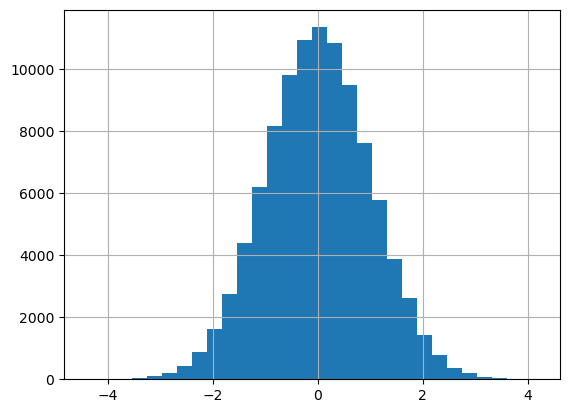

In [3]:
norm_dist = stats.norm.rvs(loc=0, 
                           scale=1, 
                           size=100000,
                           random_state=123
                          )
norm_dist = pd.Series(norm_dist)
norm_dist.hist(bins=30);

#### Percentage of the simulated data that falls between the standard deviations#

Mean of the normal distribution

In [6]:
mean_norm = np.mean(norm_dist)
mean_norm

0.0013148201751476561

Standard deviation of the normal distribution

In [7]:
std_norm = np.std(norm_dist)
std_norm

0.9995701769427331

Our lower boundary for 68% of the data - mean minus the standard deviation

In [8]:
sigma_negative = mean_norm - std_norm
sigma_negative

-0.9982553567675855

Our upper boundary for 68% of the data - mean plus the standard deviation

In [9]:
# find out the 1 standard deviation
sigma_positive = mean_norm + std_norm
sigma_positive

1.0008849971178808

Plotting our boundaries on our simulated data
* red lines are one standard deviation - our boundaries for 68% of the data
* green lines are two standard deviations - our boundaries for 95% of the data

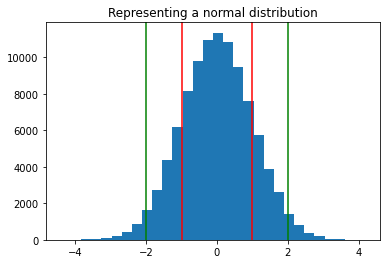

In [ ]:
# plot the normal distribution
plt.hist(norm_dist, bins=30)

# represent the -1 standard deviation
plt.axvline(sigma_negative, color = 'r')
plt.axvline(sigma_negative*2, color = 'g')

# represent the 1 standard deviation
plt.axvline(sigma_positive, color = 'r')
plt.axvline(sigma_positive*2, color = 'g')

plt.title('Representing a normal distribution')
plt.show()

What proportion of our `norm_dist` falls within 1 standard deviation from the mean?

In [10]:
sigma_plus = len(norm_dist[(norm_dist > sigma_negative) 
                          &(norm_dist < sigma_positive)])

perc_1_std = sigma_plus/len(norm_dist)

print(f"{round(perc_1_std * 100, 2)}% lies within one standard deviation of the mean")

68.1% lies within one standard deviation of the mean


What proportion of our `norm_dist` falls beyond 1 standard deviation from the mean?

In [14]:
sigma_plus_inverted = len(norm_dist[(norm_dist < sigma_negative) 
                                   |(norm_dist > sigma_positive)])

out_1_std = sigma_plus_inverted / len(norm_dist)

print(f"{round(out_1_std * 100, 2)}% falls outside of one standard deviation of the mean")

31.9% falls outside of one standard deviation of the mean


##### **Exercise 1:** 

What proportion of our `norm_dist` falls beyond two standard deviations of the mean? And beyond three?

In [18]:
# your code here
sigma_plus_inverted = len(norm_dist[(norm_dist < sigma_negative)*2 
                                   |(norm_dist > sigma_positive)*2])

out_1_std = sigma_plus_inverted / len(norm_dist)

print(f"{round(out_1_std * 100, 2)}% falls outside of one standard deviation of the mean")

16.0% falls outside of one standard deviation of the mean


## Looking at the CLT with an actual population

Let's move from theoretical distributions to real populations. We generally do not have access to a whole population: we only have access to samples. We use these samples to make guesses about the population. In this exercise we _do_ have access to the population so that we can prove how to make those guesses, and how accurate they can be.

Here's the distribution of our population, feel free to make up a story for the numbers

In [20]:
# population.csv
pop = pd.read_csv(path)

pop.head()

,0
0,1.160131
1,0.222175
2,3.101406
3,0.758150
4,2.159439


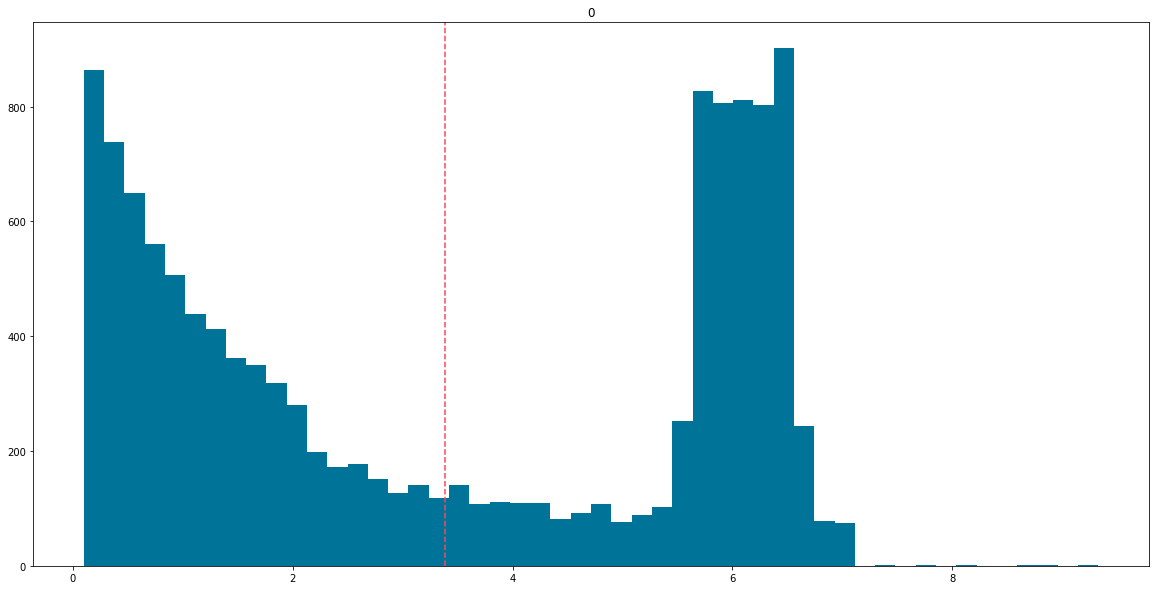

In [ ]:
pop.hist(bins=50, grid=False, color="#007398", figsize=(20,10));
plt.axvline(float(pop.mean()), linestyle="--", color="#f8485e");

Population mean:

In [ ]:
pop_mean = pop.mean()
pop_mean

0    3.387146
dtype: float64

Population Standard Deviation

In [ ]:
pop_std = np.std(pop)
pop_std

0    2.438371
dtype: float64

Number of observations in our population

In [ ]:
len(pop)

12500

Let's take a sample from our population:

In [ ]:
sample = pop.sample(n=50, random_state=4321)

Let's plot this sample as a histogram

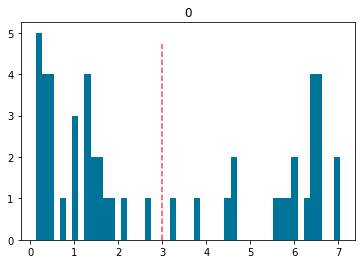

In [ ]:
# Histogram
sample.hist(bins=50, grid=False, color="#007398");

# Vertical red line representing the sample mean
plt.axvline(float(sample.mean()), linestyle="--", ymax=0.9, color="#f8485e");

The mean of the sample is similar but not equal to the mean of the population.

In [ ]:
# Sample mean
print('sample mean:', float(np.mean(sample)))
print('population mean:', float(pop_mean))

sample mean: 2.994229904318285
population mean: 3.3871463523736334


Let's recap what we know about the sample mean in relation to the population mean

According to the central limit theorem, the sample means for any population will be distributed roughly as a normal distribution around the population mean:
* Most of the sample means will be close to the population mean. 
* The sample means will be distributed, approximately, as a normal distribution around the population mean. 
* All of this will be true no matter what the distribution of the population looks like. The population from which the samples are being drawn does not have to have a normal distribution in order for the sample means to be distributed normally.

Some general rules about the central limit theorem to remember:
* If the population has extreme outliers and the samples are very small, the CLT may not function.
* We may have a population with a higly skewed distribution, the distribution of the sample means will not be skewed.
* The larger the number of the samples, the more closely the distribution will approximate the normal distribution.

### Sampling distributions

Now, we take 100, 1000 or 10000 samples, each one of size 50

In [ ]:
number_of_samples = 10000
sample_size = 50
samples = []

for number in range(number_of_samples): 
    simple_random_sample = pop.sample(n= sample_size, 
                                      replace=True
                                     )
    samples.append([simple_random_sample])

Let's make a list of the mean for each sample:

In [ ]:
sample_means = []

for s in samples:
    sample_means.append(np.mean(s))

The result is the **sampling distribution** of the **sample means**:

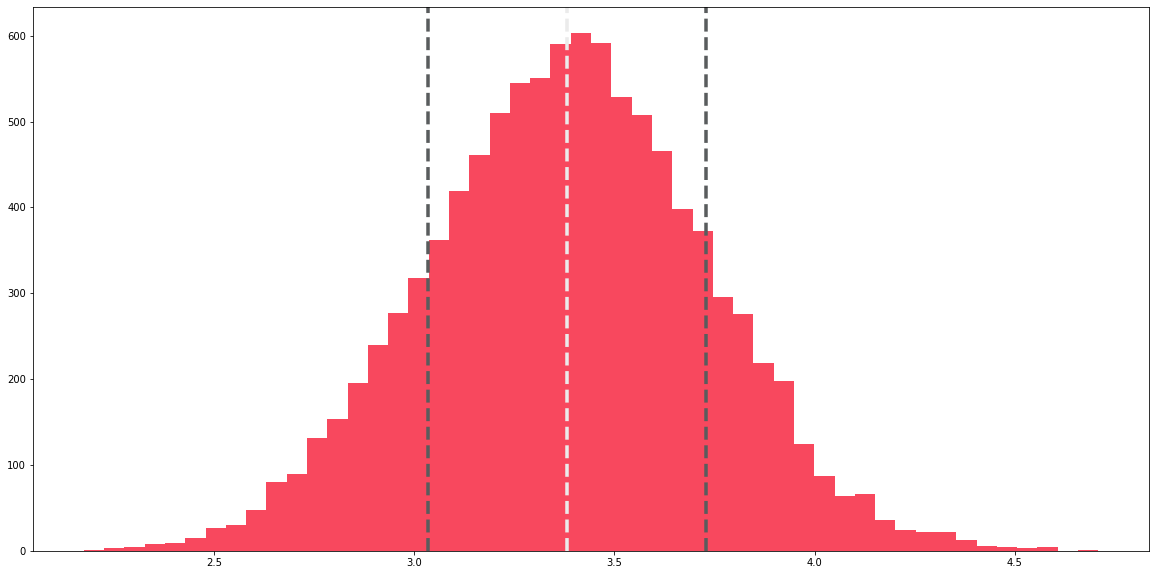

In [ ]:
# Creating a series of the means
sampling_dist_sample_means = pd.Series(sample_means)
# Finding the mean of the Series
sdsm_mean = float(sampling_dist_sample_means.mean())
# Finding the Standard Error
se = float(sampling_dist_sample_means.std())
                
# Plotting the Histogram
sampling_dist_sample_means.hist(bins=50, grid=False, figsize=(20,10), color="#f8485e");

# Plotting the vertical lines
plt.axvline(sdsm_mean, linestyle="--",linewidth=3.5, color="#EBEBEB");
plt.axvline(sdsm_mean+se, linestyle="--",linewidth=3.5, color="#595C5D");
plt.axvline(sdsm_mean-se, linestyle="--",linewidth=3.5, color="#595C5D");

We had a population of 12.500 elements, which had a weird bimodal distribution. We took 10.000 samples, each sample had size of 50. We then looked at the mean of each of the 10.000 samples, giving us 10.000 sample means. This is called a sampling distribution and it approximates the normal distribution.

The larger the sample size and the more samples taken, the more closely the distribution of sample means will approximate the normal curve. As a rule of thumb, the sample size must at least 30 for the central limit theorem to hold true.
> **Note:** a larger sample is less likely to be affected by a random variation.

The mean of the sampling distribution of the sample means should be pretty close to the true mean of the population:

In [ ]:
difference = pop_mean - np.mean(sampling_dist_sample_means)
print(f"The difference between the population mean and the mean of the sampling distribution is {round(difference[0], 4)}")

The difference between the population mean and the mean of the sampling distribution is 0.0056


### Standard error

We know that in a normal distribution, 95% of the values fall within 2 standard deviations of the mean. We will check that. But first, a terminology alert:

> The *standard deviation of the sampling distribution of the sample means* is called **standard error of the mean** or simply **standard error**.



What is the difference between the standard error and the standard deviation?

* The standard deviation measures the dispersion in the population or sample.
* The standard error measures the dispersion of the sampling distribution of sample means.

Let's look at the standard error for the samples taken from our popultaion

In [ ]:
standard_error = np.std(sampling_dist_sample_means)
standard_error

0.34768645674285437

* We know that the standard error is one standard deviation for our distribution of the sample means. 
* We know that 95% of values are contained within 2 standard deviations of the mean of our distribution of sample means.
* We can therefore conclude that if another sample has a mean that is more than 2 standard deviations away from the mean of our distribution of sample means, it is highly unlikely that they come from the same population - there's less than a 5% chance that they're from the same population

In [ ]:
# mean of distribution of sample means
mean_sdsm = np.mean(sampling_dist_sample_means)

lower_bound = mean_sdsm - 2*standard_error
upper_bound = mean_sdsm + 2*standard_error

print(round(lower_bound, 2), "-", round(upper_bound, 2))

2.69 - 4.08


In [ ]:
count = 0
for i in sample_means:
    if i > lower_bound and i < upper_bound:
        count +=1
print(f"Percentage of sample means within 2 standard errors of the mean = { count/len(sample_means)*100 }")

Percentage of sample means within 2 standard errors of the mean = 95.37


Another property the standard error is that it can be estimated by taking the standard deviation of the population and dividing it by the square root of the sample size.

Let's see how this checks out with our data:

In [ ]:
sample_size

50

In [ ]:
standard_error

0.34768645674285437

In [ ]:
# standard deviation of the population
pop_std

0    2.438371
dtype: float64

The formula of standard error is: 

$$\sigma_{M} = \frac{\sigma}{\sqrt(n)}$$

* $\sigma$ is the standard deviation of the population from which sample is drawn.
* $n$ is the size of the sample.

In [ ]:
# population standard deviation / square root of population size
pop_std/np.sqrt(sample_size)

0    0.344838
dtype: float64

When we don't have access the population, we estimate the standard error of the mean by taking the standard deviation of the sample:

In [ ]:
# sample standard deviation / square root of population size
sample.std()/np.sqrt(sample_size)

0    0.364068
dtype: float64

In the major part of the cases, we don't know the population standard deviation, so for large samples, we can assume that the standard deviation of the sample is reasonably close to the standard deviation of the population.

#### **Exercise 2:** 
Before moving on, repeat the experiment (located under the header `Sampling distributions`) changing a few parameters and note down what happens in the following cases:

* With diferent sample sizes (both smaller and greater)
* With fewer or more samples.
* Adding some extreme outliers to the population.
* Sampling without replacement.

In [ ]:
# you can copy-paste code from above in this cell
# and modify it

Summarising the main ideas: 

* If you draw large, random samples from any population, the means of those samples will be distributed normally around the population mean (regardless of what the distribution of the underlying population looks like).
* Most sample means will lie reasonably close to the poulation mean; the standard error is what defines "reasonably close".
* The central limit theorem tells us the probability that a sample mean will lie within a certain distance of the population mean. It is relatively unlikely that a sample mean willl lie more than two standard errors from the population mean, and extremely unlikely that it will lie three or more standard errors from the population mean. 
* The less likely it is that an outcome has been observed by change, the more confidence we can in surmising that some other factor is in play. 

## Squirrels example

Let's assume that the population values from earlier represent the weights of squirrels. Now, in reality, if we took a sample of squirrels we wouldn't know the mean and the standard deviation of the population - this is normal. We simply go to the forest, take a random sample of 50 squirrels and register their weight:

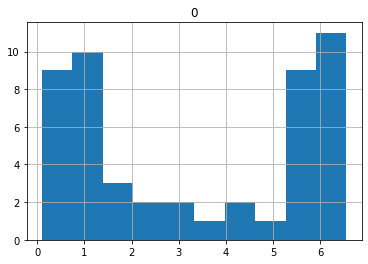

In [ ]:
squirrels = pop.sample(50, random_state=1990)

squirrels.hist();

We wonder if the mean of the weights of the squirrels is close to the 'true' mean of the population (which we can't measure)


In [ ]:
# mean of our sample
mean_squirrels = float(squirrels.mean())
mean_squirrels

3.3492958902381855

The standard error of the mean is an estimate of how far the sample mean is likely to be from the population mean.

It is an estimate of the standard deviation of the sampling distribution of the sample means, which, as we've seen, follows a normal ditribution.

In [24]:
# standard error of the mean
sem_squirrels = float(squirrels.std()/np.sqrt(len(squirrels)))
sem_squirrels

0.3451116917675317

We can also calculate the standard error using scipy

In [ ]:
stats.sem(squirrels)

array([0.34511169])

We know that no matter the distribution of our sample or the population, the sampling distribution of the sample means is normal (Central Limit Theorem).

Knowing that, we can use the properties of the normal distribution to gain information about our sample and how much it might differ from the true population.

We have:

1. The mean of the sample.
2. An estimation of the standard error.

With this two elements and knowing the CLT, we can simulate a sampling distribution of sample means built around the mean of our sample.

This sampling distribution we will simulate will be, of course, normal. We can plot it and draw the lines within 2 Standard Errors above and below the mean, representing the interval where 95% of the observations fall:

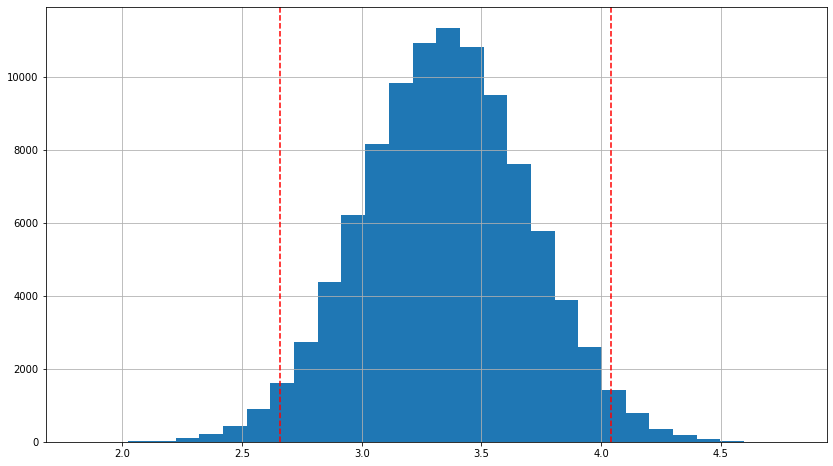

In [ ]:
# generating a normal distribution
sampling_dist_squirrels = stats.norm.rvs(loc=mean_squirrels, # The mean of the sample.
                                         scale=sem_squirrels, # An estimation of the standard error.
                                         size=100000,
                                         random_state=123
                                         )

norm_dist = pd.Series(sampling_dist_squirrels)

norm_dist.hist(bins=30, figsize=(14, 8))

plt.axvline(mean_squirrels-sem_squirrels*2, color = 'r', linestyle="--")
plt.axvline(mean_squirrels+sem_squirrels*2, color = 'r', linestyle="--");

What does this distribution and this interval tell us?

If we took many samples, and in each sample we drew this interval with the red dotted lines, 95% of the time the true mean would fall inside of the interval. 5% of the time, the mean would fall outside (2.5% in each direction).

This is why we call this the 95% confidence interval. A **confidence interval** is a 'plausible range of values' for a population parameter (in this case, the mean).

Let's calculate the upper and lower bounds of this interval:

In [ ]:
# upper bound of the confidence interval
np.mean(squirrels) + stats.sem(squirrels)*2

# if you want the results to match with the manual calculation below,
# change the "2" for a "1.96"

0    4.039519
dtype: float64

In [ ]:
# lower bound of the confidence interval
np.mean(squirrels) - stats.sem(squirrels)*2

# if you want the results to match with the manual calculation below,
# change the "2" for a "1.96"

0    2.659073
dtype: float64

In [ ]:
# using scipy to calculate the confidence interval:
stats.norm.interval(alpha=0.95, # the confidence level
                 loc=np.mean(squirrels), # mean of our sample
                 scale=stats.sem(squirrels)) # standard error of the mean

(array([2.6728894]), array([4.02570238]))

We have made some estimations that might be imperfect, for example when calculating the Standard Error. And our sample is not really big (only 50 squirrels). If we want an extra degree of confidence or, in other words, a more conservative estimate of the confidence interval, we can use a t-distribution instead of a normal distribution.

A t distribution is 'flatter' and has 'fat tails' for small populations, and is indistinguishable from a normal distribution for bigger populations.



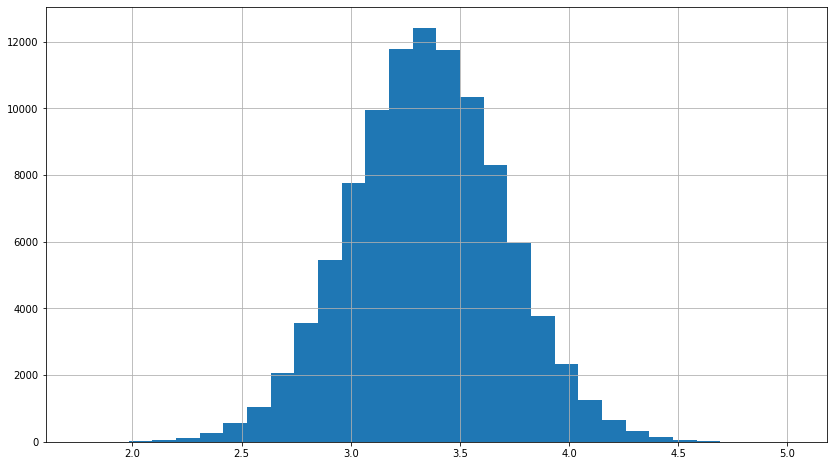

In [ ]:
# generating a t distribution
sampling_t_dist_squirrels = stats.t.rvs(loc=mean_squirrels, # The mean of the sample.
                                        scale=sem_squirrels, # An estimation of the standard error.
                                        df=len(squirrels), # Our sample size
                                        size=100000,
                                        random_state=123
                                         )

sampling_t_dist_squirrels = pd.Series(sampling_t_dist_squirrels)

sampling_t_dist_squirrels.hist(bins=30, figsize=(14, 8));

The confidence interval is slightly thinner if we use a normal distribution:

In [ ]:
# using a t distribution:
t_interval = stats.t.interval(
            0.95, # the confidence level
            len(squirrels)-1, # degrees of freedom = sample size - 1
            loc=np.mean(squirrels), # mean of our sample
            scale=stats.sem(squirrels) # standard error of the mean
            )

t_interval

(array([2.65576798]), array([4.0428238]))

### **Exercise 3:**

Did the true mean really fall within the 95% confidence interval?

In [ ]:
# your code here
yes (3.34)

Probably yes, but beware: by definition, 5% of the time it will not!

### **Exercise 4**: 
Can you run the experiment 10,000 times and prove it?

In [22]:
# your code here
mean_list = []
for i in range(10000):
    squirrels = pop.sample(50, random_state=1990)
    mean_squirrels = float(squirrels.mean())
    mean_list.append(mean_squirrels)

fin_mean = np.mean(mean_list)
print(fin_mean)

3.349295890238187


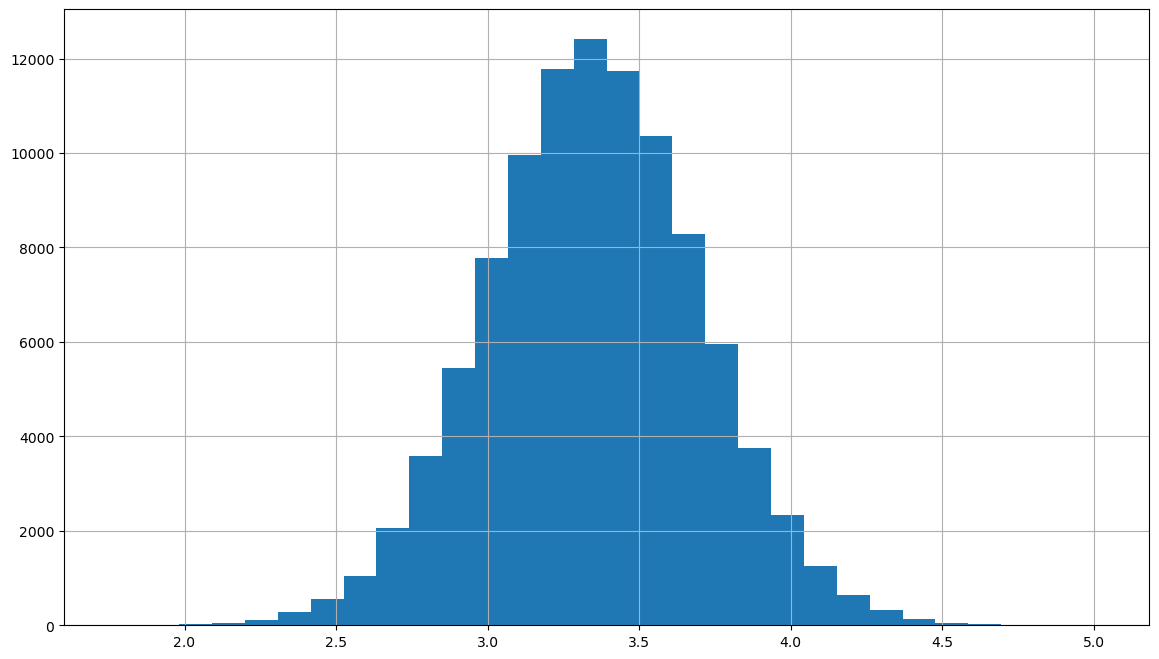

In [25]:
# generating a t distribution
sampling_t_dist_squirrels = stats.t.rvs(loc=fin_mean, # The mean of the sample.
                                        scale=sem_squirrels, # An estimation of the standard error.
                                        df=len(squirrels), # Our sample size
                                        size=100000,
                                        random_state=123
                                         )

sampling_t_dist_squirrels = pd.Series(sampling_t_dist_squirrels)

sampling_t_dist_squirrels.hist(bins=30, figsize=(14, 8));